## Preambule

In [7]:
# General packages
import numpy as np
import pandas as pd
from tqdm import tqdm
from pathlib import Path
import xarray as xr
import json

# Plotting
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.colors import n_colors

## Read

In [8]:
path_main = Path("K:/Code/EffortSharing/")
path_data = Path("K:/Data/Data_EffortSharing/DataUpdate_ongoing/")
path_figs = path_main / "Figures" / "NZreport"

In [9]:
xr_dataread = xr.open_dataset(path_data / "xr_dataread.nc")
all_regions_iso = np.load(path_data / "all_regions.npy")
all_regions_names = np.load(path_data / "all_regions_names.npy")
all_countries_iso = np.load(path_data / "all_countries.npy", allow_pickle=True)
all_countries_names = np.load(path_data / "all_countries_names.npy", allow_pickle=True)

In [30]:
xr_allocs = []
for cty in ['USA', 'BRA']:#, 'AUS', 'BRA', 'RUS', 'ZAF']:
    xr_allocs.append(xr.open_dataset(path_data / "Allocations_CO2_excl" / ("xr_alloc_"+cty+".nc")).expand_dims({'Region':[cty]})[['GF', 'ECPC', 'PCC', 'AP']].sel(Temperature=1.6, Risk=0.5, NegEmis=0.5, NonCO2red=0.5, Timing='Immediate', Scenario='SSP2'))
xr_allocs = xr.merge(xr_allocs)

xr_allocs_incl = []
for cty in ['USA', 'BRA']:#, 'AUS', 'BRA', 'RUS', 'ZAF']:
    xr_allocs_incl.append(xr.open_dataset(path_data / "Allocations_CO2_incl" / ("xr_alloc_"+cty+".nc")).expand_dims({'Region':[cty]})[['GF', 'ECPC', 'PCC', 'AP']].sel(Temperature=1.6, Risk=0.5, NegEmis=0.5, NonCO2red=0.5, Timing='Immediate', Scenario='SSP2'))
xr_allocs_incl = xr.merge(xr_allocs_incl)

In [55]:
float(xr_dataread.Budget.sel(Temperature=1.5, Risk=0.5, NonCO2red=0.5))

299.18674172430786

In [60]:
y = xr_dataread.CO2_globe_excl.sel(Temperature=1.5, Risk=0.5, NonCO2red=0.5, Timing='Immediate', NegEmis=0.5)
y[y<0] = 0
np.sum(y)

<xarray.DataArray 'CO2_globe_excl' ()> Size: 8B
array(270145.91397697)
Coordinates:
    Temperature  float64 8B 1.5
    Risk         float64 8B 0.5
    NonCO2red    float64 8B 0.5
    NegEmis      float64 8B 0.5
    Timing       <U9 36B 'Immediate'
    Variable     <U24 96B ...

In [38]:
xr.open_dataset(path_data / "Allocations" / ("xr_alloc_"+"BRA"+".nc")).expand_dims({'Region':[cty]})[['GF', 'ECPC', 'PCC', 'AP']].sel(Temperature=1.6, Risk=0.5, NegEmis=0.5, NonCO2red=0.5, Timing='Immediate', Scenario='SSP2')

<xarray.Dataset> Size: 9kB
Dimensions:               (Region: 1, Time: 80, Discount_factor: 4,
                           Historical_startyear: 3, Convergence_year: 13)
Coordinates:
  * Region                (Region) object 8B 'BRA'
    Scenario              <U4 16B 'SSP2'
  * Time                  (Time) int32 320B 2021 2022 2023 ... 2098 2099 2100
    Temperature           float64 8B 1.6
    Risk                  float64 8B 0.5
    NonCO2red             float64 8B 0.5
    NegEmis               float64 8B 0.5
    Timing                <U9 36B 'Immediate'
  * Convergence_year      (Convergence_year) int32 52B 2040 2045 ... 2095 2100
  * Discount_factor       (Discount_factor) float64 32B 0.0 1.6 2.0 2.8
  * Historical_startyear  (Historical_startyear) int64 24B 1850 1950 1990
Data variables:
    GF                    (Region, Time) float32 320B 2.266e+03 ... -63.89
    ECPC                  (Region, Discount_factor, Historical_startyear, Time) float32 4kB ...
    PCC                   (Region, Time, Convergence_year) float32 4kB 2.266e...
    AP                    (Region, Time) float32 320B 2.287e+03 ... -544.6

In [31]:
xr_allocs.sel(Region='BRA', Time=2021)

<xarray.Dataset> Size: 412B
Dimensions:               (Convergence_year: 13, Discount_factor: 4,
                           Historical_startyear: 3)
Coordinates:
    Time                  int32 4B 2021
  * Convergence_year      (Convergence_year) int32 52B 2040 2045 ... 2095 2100
  * Discount_factor       (Discount_factor) float64 32B 0.0 1.6 2.0 2.8
  * Historical_startyear  (Historical_startyear) int64 24B 1850 1950 1990
    Region                <U3 12B 'BRA'
    Scenario              <U4 16B 'SSP2'
    Temperature           float64 8B 1.6
    Risk                  float64 8B 0.5
    NonCO2red             float64 8B 0.5
    NegEmis               float64 8B 0.5
    Timing                <U9 36B 'Immediate'
    Variable              <U24 96B 'Emissions|N2O|AFOLU|Land'
Data variables:
    GF                    float32 4B 522.6
    ECPC                  (Discount_factor, Historical_startyear) float32 48B ...
    PCC                   (Convergence_year) float32 52B 522.6 522.6 ... 522.6
    AP                    float32 4B 1.372e+03

In [32]:
xr_allocs_incl.sel(Region='BRA', Time=2021)

<xarray.Dataset> Size: 412B
Dimensions:               (Convergence_year: 13, Discount_factor: 4,
                           Historical_startyear: 3)
Coordinates:
    Time                  int32 4B 2021
  * Convergence_year      (Convergence_year) int32 52B 2040 2045 ... 2095 2100
  * Discount_factor       (Discount_factor) float64 32B 0.0 1.6 2.0 2.8
  * Historical_startyear  (Historical_startyear) int64 24B 1850 1950 1990
    Region                <U3 12B 'BRA'
    Scenario              <U4 16B 'SSP2'
    Temperature           float64 8B 1.6
    Risk                  float64 8B 0.5
    NonCO2red             float64 8B 0.5
    NegEmis               float64 8B 0.5
    Timing                <U9 36B 'Immediate'
    Variable              <U24 96B 'Emissions|N2O|AFOLU|Land'
Data variables:
    GF                    float32 4B 1.467e+03
    ECPC                  (Discount_factor, Historical_startyear) float32 48B ...
    PCC                   (Convergence_year) float32 52B 1.467e+03 ... 1.467e+03
    AP                    float32 4B 1.481e+03

## Plot

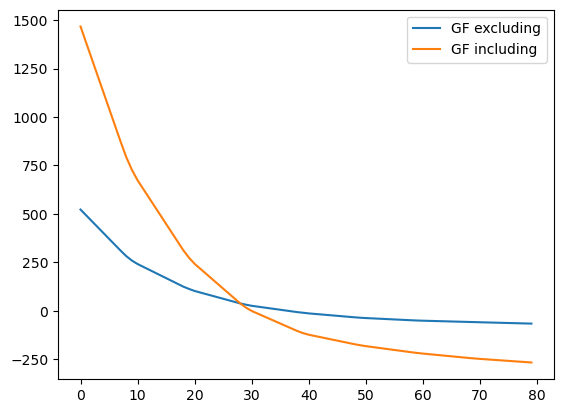

In [35]:
reg = 'BRA'
#plt.plot(xr_allocs.sel(Region=reg).AP, label='AP')
#plt.plot(xr_allocs.sel(Region=reg).ECPC.mean(dim=['Discount_factor', 'Historical_startyear']), label='ECPC')
#plt.plot(xr_allocs.sel(Region=reg).PCC.mean(dim='Convergence_year'), label='PCC excluding')
plt.plot(xr_allocs.sel(Region=reg).GF, label='GF excluding')

#plt.plot(xr_allocs_incl.sel(Region=reg).AP, label='AP')
#plt.plot(xr_allocs_incl.sel(Region=reg).ECPC.mean(dim=['Discount_factor', 'Historical_startyear']), label='ECPC')
#plt.plot(xr_allocs_incl.sel(Region=reg).PCC.mean(dim='Convergence_year'), label='PCC including')
plt.plot(xr_allocs_incl.sel(Region=reg).GF, label='GF including')
plt.legend()

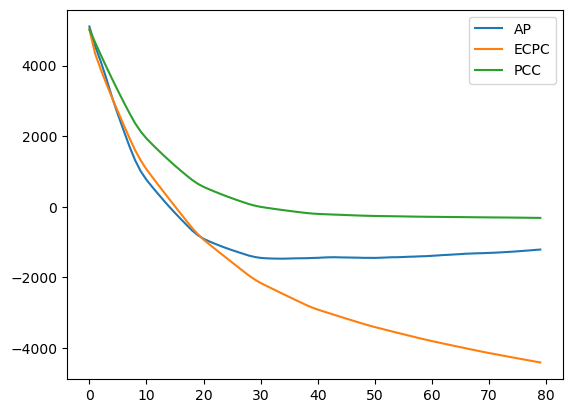

In [15]:
reg = 'USA'
plt.plot(xr_allocs_incl.sel(Region=reg).AP, label='AP')
plt.plot(xr_allocs_incl.sel(Region=reg).ECPC.mean(dim=['Discount_factor', 'Historical_startyear']), label='ECPC')
plt.plot(xr_allocs_incl.sel(Region=reg).PCC.mean(dim='Convergence_year'), label='PCC')
plt.legend()

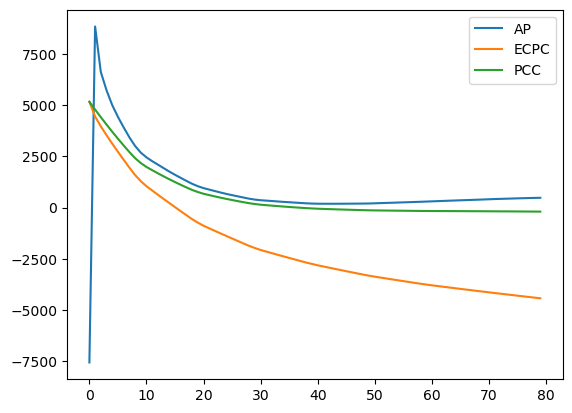

In [30]:
plt.plot(xr_allocs.sel(Region='USA').AP, label='AP')
plt.plot(xr_allocs.sel(Region='USA').ECPC.mean(dim=['Discount_factor', 'Historical_startyear']), label='ECPC')
plt.plot(xr_allocs.sel(Region='USA').PCC.mean(dim='Convergence_year'), label='PCC')
plt.legend()

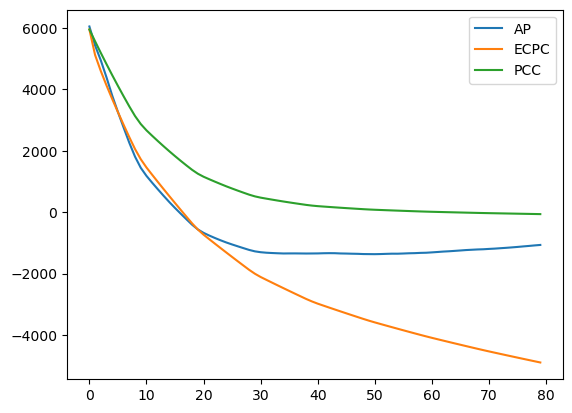

In [32]:
plt.plot(xr_allocs.sel(Region='USA').AP, label='AP')
plt.plot(xr_allocs.sel(Region='USA').ECPC.mean(dim=['Discount_factor', 'Historical_startyear']), label='ECPC')
plt.plot(xr_allocs.sel(Region='USA').PCC.mean(dim='Convergence_year'), label='PCC')
plt.legend()